In [27]:
from __future__ import print_function

import gzip
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import (
    Activation,
    BatchNormalization,
    Conv2D,
    Dense,
    Dropout,
    Flatten,
    MaxPooling2D,
)
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adadelta, Adam, RMSprop
from tensorflow.keras.utils import to_categorical

In [38]:
# Parameters
batch_size = 128
num_classes = 10
epochs = 10
img_rows, img_cols = 28, 28

# Load and preprocess MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## Data Exploration


x_train shape: (60000, 28, 28, 1)
60000 train samples, 10000 test samples


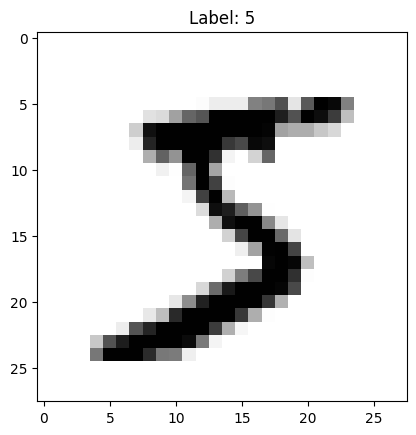

In [39]:
# Reshape based on image data format
input_shape = (img_rows, img_cols, 1)
x_train = x_train.reshape(x_train.shape[0], *input_shape)
x_test = x_test.reshape(x_test.shape[0], *input_shape)

# Normalize and one-hot encode
x_train, x_test = x_train.astype("float32") / 255, x_test.astype("float32") / 255
y_train, y_test = (
    to_categorical(y_train, num_classes),
    to_categorical(y_test, num_classes),
)

print(f"x_train shape: {x_train.shape}")
print(f"{x_train.shape[0]} train samples, {x_test.shape[0]} test samples")

# Display an example image
plt.imshow(x_train[0].reshape(img_rows, img_cols), cmap=plt.cm.binary)
plt.title(f"Label: {y_train[0].argmax()}")
plt.show()

## Multi-Layer Perceptron (MLP)


In [40]:
# Multi-Layer Perceptron (MLP)
mlp_model = Sequential(
    [
        Dense(512, activation="relu", input_shape=(784,)),
        Dense(num_classes, activation="softmax"),
    ]
)
print("\nMLP Model Summary:")
mlp_model.summary()


MLP Model Summary:


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
mlp_model.compile(
    loss="categorical_crossentropy", optimizer=RMSprop(), metrics=["accuracy"]
)

x_train_mlp = x_train.reshape(x_train.shape[0], -1)
x_test_mlp = x_test.reshape(x_test.shape[0], -1)
mlp_model.fit(
    x_train_mlp,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test_mlp, y_test),
)
mlp_score = mlp_model.evaluate(x_test_mlp, y_test)
print(f"MLP Test loss: {mlp_score[0]} | Test accuracy: {mlp_score[1]}")

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8720 - loss: 0.4423 - val_accuracy: 0.9547 - val_loss: 0.1469
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9660 - loss: 0.1165 - val_accuracy: 0.9743 - val_loss: 0.0893
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9779 - loss: 0.0770 - val_accuracy: 0.9753 - val_loss: 0.0777
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9839 - loss: 0.0527 - val_accuracy: 0.9785 - val_loss: 0.0683
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9894 - loss: 0.0369 - val_accuracy: 0.9806 - val_loss: 0.0609
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9918 - loss: 0.0273 - val_accuracy: 0.9793 - val_loss: 0.0636
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9938 - loss: 0.0216 - val_accuracy: 0.9812 - val_loss: 0.0635
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9953 - loss: 0.0172 - val_accuracy: 0.

In [42]:
# Convolutional Neural Network (CNN)
cnn_model = Sequential(
    [
        Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=input_shape),
        Conv2D(64, kernel_size=(3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        Flatten(),
        Dense(128, activation="relu"),
        Dropout(0.5),
        Dense(num_classes, activation="softmax"),
    ]
)
print("\nCNN Model Summary:")
cnn_model.summary()


CNN Model Summary:


/home/nissim/snap/code/176/.local/share/virtualenvs/musa-650-spring-2025-BY6WbUPk/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

In [43]:
cnn_model.compile(
    loss="categorical_crossentropy", optimizer=Adadelta(), metrics=["accuracy"]
)

cnn_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test),
)
cnn_score = cnn_model.evaluate(x_test, y_test)
print(f"CNN Test loss: {cnn_score[0]} | Test accuracy: {cnn_score[1]}")

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.1414 - loss: 2.2899 - val_accuracy: 0.2986 - val_loss: 2.2343
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.2487 - loss: 2.2276 - val_accuracy: 0.4253 - val_loss: 2.1553
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.3359 - loss: 2.1516 - val_accuracy: 0.5396 - val_loss: 2.0538
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.4009 - loss: 2.0563 - val_accuracy: 0.6073 - val_loss: 1.9241
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.4648 - loss: 1.9362 - val_accuracy: 0.6663 - val_loss: 1.7639
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.5233 - loss: 1.7882 - val_accuracy: 0.7139 - val_loss: 1.5786
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.5706 - loss: 1.6268 - val_accuracy: 0.7554 - val_loss: 1.3866
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.6036 - loss: 1.4756 - 

In [ ]:
# Load the PlanesNet pickle file
with gzip.open("planesnet.pklz", "rb") as f:
    planesnet = pickle.load(f)

# Create a DataFrame from the loaded data
data = pd.DataFrame(
    {
        "data": planesnet[
            "data"
        ].tolist(),  # Convert the numpy array into a list of pixel values
        "labels": planesnet["labels"],
        "locations": planesnet["locations"],
        "scene_ids": planesnet["scene_ids"],
    }
)

                                                data  labels  \
0  [223, 238, 251, 247, 233, 191, 172, 248, 255, ...       1   
1  [63, 82, 136, 192, 200, 204, 201, 195, 196, 19...       1   
2  [229, 223, 223, 213, 218, 227, 222, 195, 167, ...       1   
3  [175, 186, 199, 208, 192, 229, 218, 210, 234, ...       1   
4  [196, 194, 200, 200, 199, 223, 225, 228, 243, ...       1   

                                   locations             scene_ids  
0  [-122.38882031560846, 37.619920164996195]  20170609_180754_101b  
1            [-122.390301355, 37.6126867574]  20161116_180805_0e14  
2             [-118.40918488, 33.9401910618]  20170520_174842_1008  
3   [-118.40728114680799, 33.93975272773884]  20170627_174937_1015  
4   [-118.40728114680799, 33.93975272773884]  20170613_174901_1036  


In [8]:
data.head()

,data,labels,locations,scene_ids
0,"[223, 238, 251, 247, 233, 191, 172, 248, 255, ...",1,"[-122.38882031560846, 37.619920164996195]",20170609_180754_101b
1,"[63, 82, 136, 192, 200, 204, 201, 195, 196, 19...",1,"[-122.390301355, 37.6126867574]",20161116_180805_0e14
2,"[229, 223, 223, 213, 218, 227, 222, 195, 167, ...",1,"[-118.40918488, 33.9401910618]",20170520_174842_1008
3,"[175, 186, 199, 208, 192, 229, 218, 210, 234, ...",1,"[-118.40728114680799, 33.93975272773884]",20170627_174937_1015
4,"[196, 194, 200, 200, 199, 223, 225, 228, 243, ...",1,"[-118.40728114680799, 33.93975272773884]",20170613_174901_1036


In [9]:
## Read image data into a 2D matrix
X = np.array(data.data.tolist())
X.shape

(32000, 1200)

In [10]:
## Reshape the image data to 20x20 image patches with 3 channels (RGB)
X = X.reshape(32000, 3, 20, 20)
X.shape

(32000, 3, 20, 20)

In [11]:
## Standard format for RGB is "the channels at the end"; move the axis for channels to the end
X = np.moveaxis(X, 1, 3)
X.shape

(32000, 20, 20, 3)

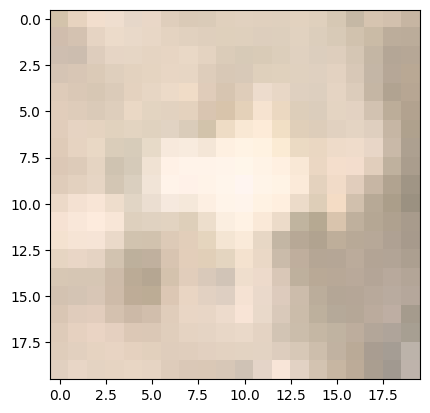

In [14]:
## View few images
tmpI = X[80, :, :, :]
plt.imshow(tmpI)
plt.show()

In [15]:
## Read the labels
y = np.array(data["labels"])
y.shape

(32000,)

In [ ]:
## Split the data into training ans testing sets
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.20)

## Scale the data
scalar = MinMaxScaler()
scalar.fit(X_tr.reshape(X_tr.shape[0], -1))
X_tr = scalar.transform(X_tr.reshape(X_tr.shape[0], -1)).reshape(X_tr.shape)
X_te = scalar.transform(X_te.reshape(X_te.shape[0], -1)).reshape(X_te.shape)

In [19]:
## Show data size
print(X_tr.shape)
print(y_tr.shape)
print(X_te.shape)
print(y_te.shape)

(25600, 20, 20, 3)
(25600,)
(6400, 20, 20, 3)
(6400,)


In [21]:
## Get the shape of a single sample
dshape = X_tr.shape[1:]
dshape

(20, 20, 3)

In [22]:
## Construct the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), input_shape=dshape))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))

print(model.summary())

/home/nissim/snap/code/179/.local/share/virtualenvs/musa-650-spring-2025-BY6WbUPk/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-01-10 16:49:06.468837: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 18, 18, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 18, 18, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 18, 18, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 9, 9, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 7, 7, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 7, 7, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,961 (113.13 KB)

 Trainable params: 28,833 (112.63 KB)

 Non-trainable params: 128 (512.00 B)

None


In [23]:
## Compile the model
OPT = Adam(learning_rate=0.0001)
NUM_EPOCH = 15
B_SIZE = 64
model.compile(loss="binary_crossentropy", optimizer=OPT, metrics=["accuracy"])

In [24]:
## Train the model
mdl_tr = model.fit(
    X_tr,
    y_tr,
    batch_size=B_SIZE,
    epochs=NUM_EPOCH,
    shuffle=True,
    validation_data=(X_te, y_te),
)

Epoch 1/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7386 - loss: 0.5383 - val_accuracy: 0.7625 - val_loss: 0.6735
Epoch 2/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9133 - loss: 0.2275 - val_accuracy: 0.8661 - val_loss: 0.2806
Epoch 3/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9367 - loss: 0.1697 - val_accuracy: 0.8698 - val_loss: 0.2708
Epoch 4/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9426 - loss: 0.1519 - val_accuracy: 0.9544 - val_loss: 0.1290
Epoch 5/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9526 - loss: 0.1307 - val_accuracy: 0.9600 - val_loss: 0.1125
Epoch 6/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9549 - loss: 0.1234 - val_accuracy: 0.9333 - val_loss: 0.1594
Epoch 7/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9582 - loss: 0.1136 - val_accuracy: 0.9647 - val_loss: 0.1029
Epoch 8/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9603 - loss: 0.1066 - val_accuracy: 0.

Text(0.5, 0, 'epochs')

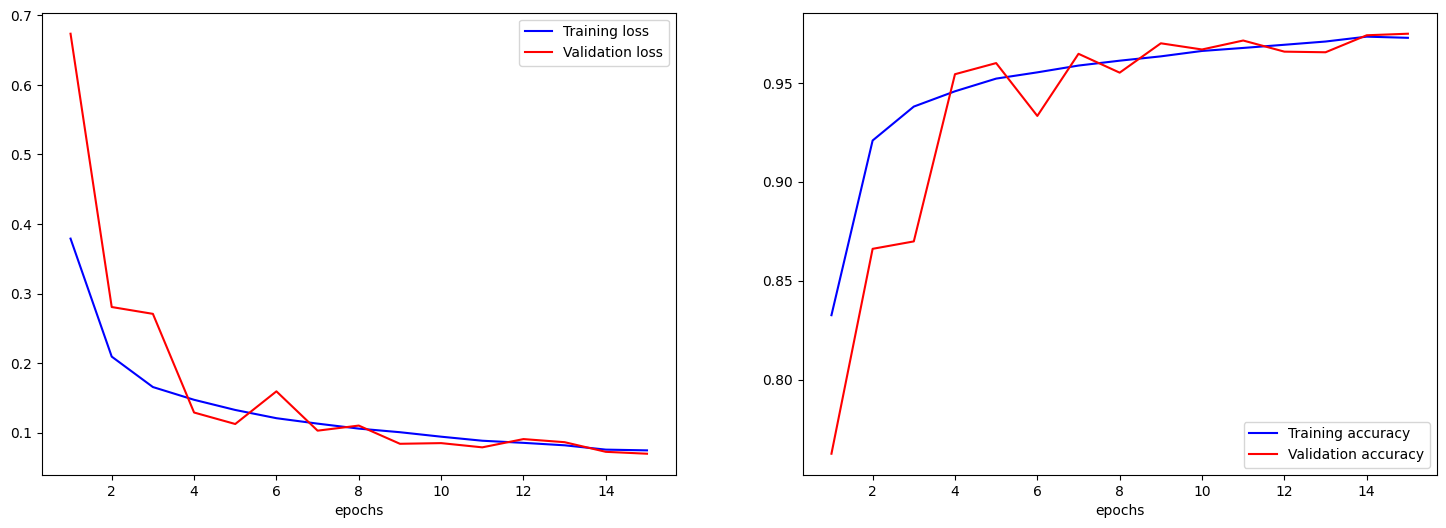

In [25]:
## Plot the learning stats
fig, ax = plt.subplots(1, 2, figsize=[18, 6])
ax[0].plot(
    range(1, NUM_EPOCH + 1), mdl_tr.history["loss"], c="blue", label="Training loss"
)
ax[0].plot(
    range(1, NUM_EPOCH + 1),
    mdl_tr.history["val_loss"],
    c="red",
    label="Validation loss",
)
ax[0].legend()
ax[0].set_xlabel("epochs")

ax[1].plot(
    range(1, NUM_EPOCH + 1),
    mdl_tr.history["accuracy"],
    c="blue",
    label="Training accuracy",
)
ax[1].plot(
    range(1, NUM_EPOCH + 1),
    mdl_tr.history["val_accuracy"],
    c="red",
    label="Validation accuracy",
)
ax[1].legend()
ax[1].set_xlabel("epochs")